## AEROPOLIS
#### Group 296881

In [ ]:
"""
SMALL SUMMARY --- --- --- REMOVE BEFORE SUBMISSION --- --- ---



One single notebook called “main.ipynb” with ALL the code used for the project.



The notebook must have the following characteristics:

    1. Text and code cells must alternate from start to finish. The text cell above must
       describe the contents of the code below and its output so that a reader can easily
       follow up on your implementation. 

    2. You must explain what you will do and why you chose to do so.

    3. You must explain the outputs of the cell (if any) with particular attention
       to describing figures such that a reader already knows what he is going to see.
"""

In [ ]:
"""
ALL TASKS --- --- --- REMOVE BEFORE SUBMISSION --- ---- ----

Data Preprocessing:
    Load and inspect the dataset.
    Handle missing values (e.g., impute or drop).
    Encode categorical features (e.g., one-hot encoding).

Model Selection and Training:
    Choose a machine learning algorithm (maybe Random Forest Regressor).
    Split the data into training and testing sets (80%/20% split).
    Train the model on the training set.

Model Evaluation:
    Evaluate the model using metrics such as Mean Absolute Error (MAE) and R-squared.
    Compare with baseline models (e.g., Linear Regression, Decision Trees).

Model Improvement:
    Perform hyperparameter tuning (e.g., using GridSearchCV).
    Optionally, explore other models like Gradient Boosting.

Feature Importance:
    Visualize feature importance from the Random Forest model.

Reporting:
    Write the project report, including:
        Introduction: Brief project overview.
        Methods: Approach, algorithm, features, and environment setup.
        Experimental Design: Baselines, metrics, and purpose of experiments.
        Results: Evaluation metrics, findings, and visualizations.
        Conclusions: Takeaways, unanswered questions, and next steps.

Code and Documentation:
    Provide clean, well-documented code.
    Include instructions for setting up the environment (e.g., requirements.txt or conda environment).
"""

## [SECTION 1] Introduction and EDA

To be added. Brief overview and aim. Lorem ipsum.

### Data Preparation

We sample our dataset for ease of calculation (especially in the early stages).
The earliest sample was 1.000 with frac = 0.001, then 10.000 with frac = 0.01.

In [ ]:
import pandas as pd

# Get the filepath from user and read the data
fileInput = "EnterYourFilepath"
df_or = pd.read_csv(f"{fileInput}/aeropolis.csv")

# Sample a smaller version of the dataset
df_sm = df_or.sample(frac=0.01, random_state=1) 
"""
Started with 10.000 entries instead of the original 1.000.000
"""

# Save the above (smaller) dataset
df_sm.to_csv('aeropolis_sample.csv', index=False)

### Data Explanation

Add info about shape, num of entries etc. Lorem ipsum.

In [ ]:
# Data Structure

df = df_or 
# Easily switch between the original dataset and saple (df_sm) as needed

print("--- First Few Entries of the Dataset ---")
df.head()

--- First Few Entries of the Dataset ---


,Cargo_Capacity_kg,Air_Temperature_Celsius,Weather_Status,Package_Type,Vertical_Landing,Equipment_Cost,Market_Region,Flight_Duration_Minutes,Terrain_Type,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Climate_Zone,Quantum_Battery,Flight_Zone,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,Route_Optimization_Per_Second
0,4.270384,32.241410,Cloudy,Maize,Supported,36563.84,Local,False,NaN,5831.79,164.0,112.0,86.49,Arid,False,East,0.39,412.0,756.205234,651.62
1,5.120852,24.635445,Sunny,Cotton,Supported,29156.29,Local,False,Sandy,NaN,160.0,NaN,15.13,Arid,True,East,0.90,207.0,618.345249,1102.33
2,2.976017,16.292566,Cloudy,Barley,Unknown,10909.55,International,False,Sandy,4797.87,127.0,93.0,25.76,Temperate,False,North,0.54,NaN,548.243396,975.97
3,4.990381,NaN,Sunny,Soybean,NaN,48315.38,International,True,Clay,7764.89,160.0,80.0,165.06,Polar,True,West,0.10,354.0,447.768700,924.49
4,2.938318,21.689674,NaN,Soybean,Unknown,49506.24,Local,False,Clay,4979.04,136.0,93.0,55.70,Temperate,False,North,0.73,346.0,342.361072,909.98


In [ ]:
# Dataset Statistics

dtypes_count = df.dtypes.value_counts()

# Dataset Statistics
print(f"{'Dataset Statistics':^34}")
print(f"{'-'*34}")
print(f"{'Number of Rows':<25}: {df.shape[0]}")
print(f"{'Number of Columns':<25}: {df.shape[1]}")

# Printing dtype counts
for dtype, count in dtypes_count.items():
    print(f"Number of Dtype {str(dtype):<9}: {count}")

print("\n\n--- Descriptive Statistics ---")
describe_df = df.describe().round(3)
describe_df

        Dataset Statistics        
----------------------------------
Number of Rows           : 1000000
Number of Columns        : 20
Number of Dtype float64  : 11
Number of Dtype object   : 9


--- Descriptive Statistics ---


,Cargo_Capacity_kg,Air_Temperature_Celsius,Equipment_Cost,Water_Usage_liters,Flight_Hours,Delivery_Time_Minutes,Cleaning_Liquid_Usage_liters,Autopilot_Quality_Index,Vertical_Max_Speed,Wind_Speed_kmph,Route_Optimization_Per_Second
count,899767.000,900236.000,900197.000,900344.000,900273.000,900036.000,899602.000,900189.000,899779.000,900212.000,899614.000
mean,4.650,27.502,29987.481,4999.072,149.995,104.483,50.093,0.500,299.316,550.079,999.719
std,1.696,7.221,11548.037,1500.070,12.255,25.945,50.073,0.289,115.500,259.809,199.873
min,-1.148,15.000,10000.140,-2323.700,95.000,60.000,0.000,0.000,100.000,100.001,-133.070
25%,3.419,21.253,19972.210,3987.088,142.000,82.000,14.450,0.250,199.000,325.136,864.782
50%,4.652,27.505,29986.650,4997.685,150.000,104.000,34.730,0.500,299.000,550.349,999.750
75%,5.879,33.752,39990.970,6011.532,158.000,127.000,69.428,0.750,399.000,774.780,1134.480
max,9.963,40.000,49999.990,13104.200,213.000,149.000,716.380,1.000,499.000,999.998,1999.670


## EDA - Exploratory Data Analysis
### Missing Values and Data Integrity

We start by checking for missing values. Of all 1.000.000 entries around 100.000 of each category is missing. This is nearly 10% of all data.

In [ ]:
# Count NaN values
nan_count = df.isna().sum()
nan_count_sorted = nan_count.sort_values(ascending=False)

# Display NaN count statistics
print(f"{'NaN Count Statistics':^44}")
print(f"{'-'*44}")

# Printing NaN count for each column
for column, count in nan_count_sorted.items():
    print(f"In {column:<33}: {count}")

            NaN Count Statistics            
--------------------------------------------
In Package_Type                     : 100421
In Cleaning_Liquid_Usage_liters     : 100398
In Route_Optimization_Per_Second    : 100386
In Cargo_Capacity_kg                : 100233
In Vertical_Max_Speed               : 100221
In Climate_Zone                     : 100177
In Weather_Status                   : 100174
In Flight_Zone                      : 100157
In Market_Region                    : 100113
In Quantum_Battery                  : 99993
In Delivery_Time_Minutes            : 99964
In Flight_Duration_Minutes          : 99953
In Autopilot_Quality_Index          : 99811
In Equipment_Cost                   : 99803
In Wind_Speed_kmph                  : 99788
In Air_Temperature_Celsius          : 99764
In Flight_Hours                     : 99727
In Terrain_Type                     : 99671
In Water_Usage_liters               : 99656
In Vertical_Landing                 : 99566


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate missing and non-missing values
missing_values = df.isnull().sum()
non_missing_values = df.notnull().sum()
missing_percentage = ((missing_values / len(df)) * 100).round(2)

df = df_or # Use original dataset (or switch to sample "df_sm" as needed)

dtypes = df.dtypes

missing_data = pd.DataFrame({
    'Non_Null_Values': non_missing_values,
    'Null_Values': missing_values,
    '%_Missing': missing_percentage,
    'Data_Type': dtypes.values
}).sort_values(by='Null_Values', ascending=False)

# Output
missing_data


# Let's use either this or the one before but not both...


,Non_Null_Values,Null_Values,%_Missing,Data_Type
Package_Type,899579,100421,10.04,object
Cleaning_Liquid_Usage_liters,899602,100398,10.04,float64
Route_Optimization_Per_Second,899614,100386,10.04,float64
Cargo_Capacity_kg,899767,100233,10.02,float64
Vertical_Max_Speed,899779,100221,10.02,float64
Climate_Zone,899823,100177,10.02,object
Weather_Status,899826,100174,10.02,object
Flight_Zone,899843,100157,10.02,object
Market_Region,899887,100113,10.01,object
Quantum_Battery,900007,99993,10.00,object


Now we visualize the missing data using several methods to gain a better understanding and detect any unusual patterns.

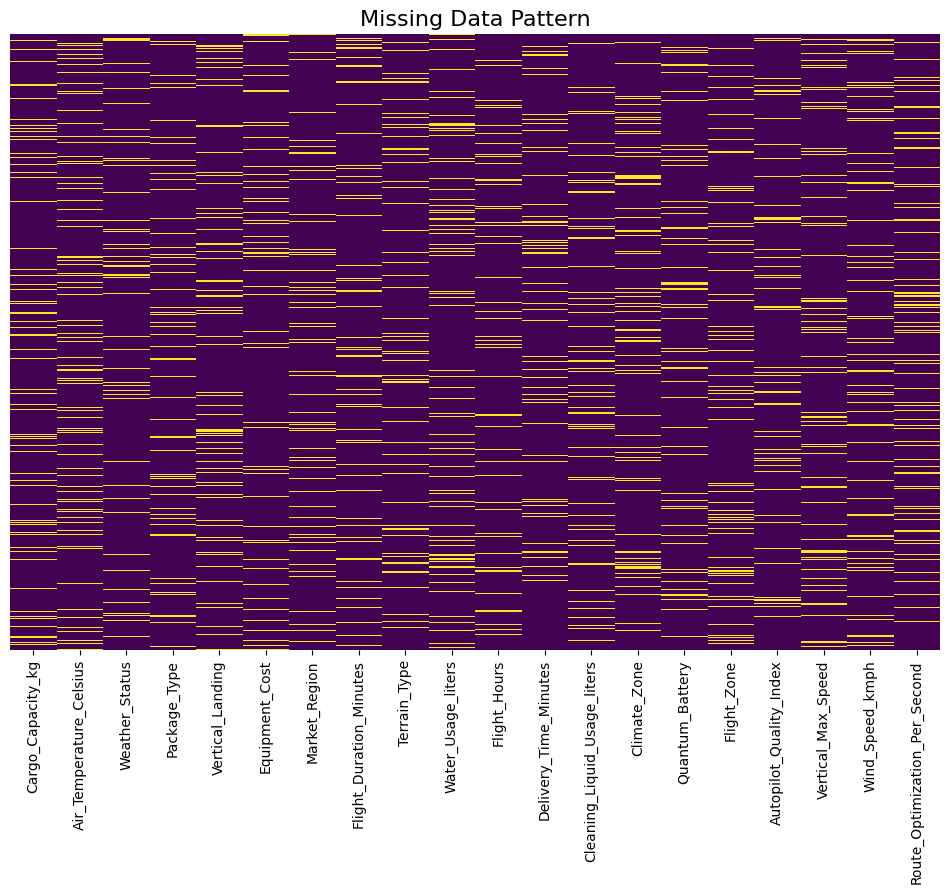

In [ ]:
# Visualize missing data patterns
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title('Missing Data Pattern', fontsize=16)
plt.show()

Further Visaualization using missingno

<Axes: >

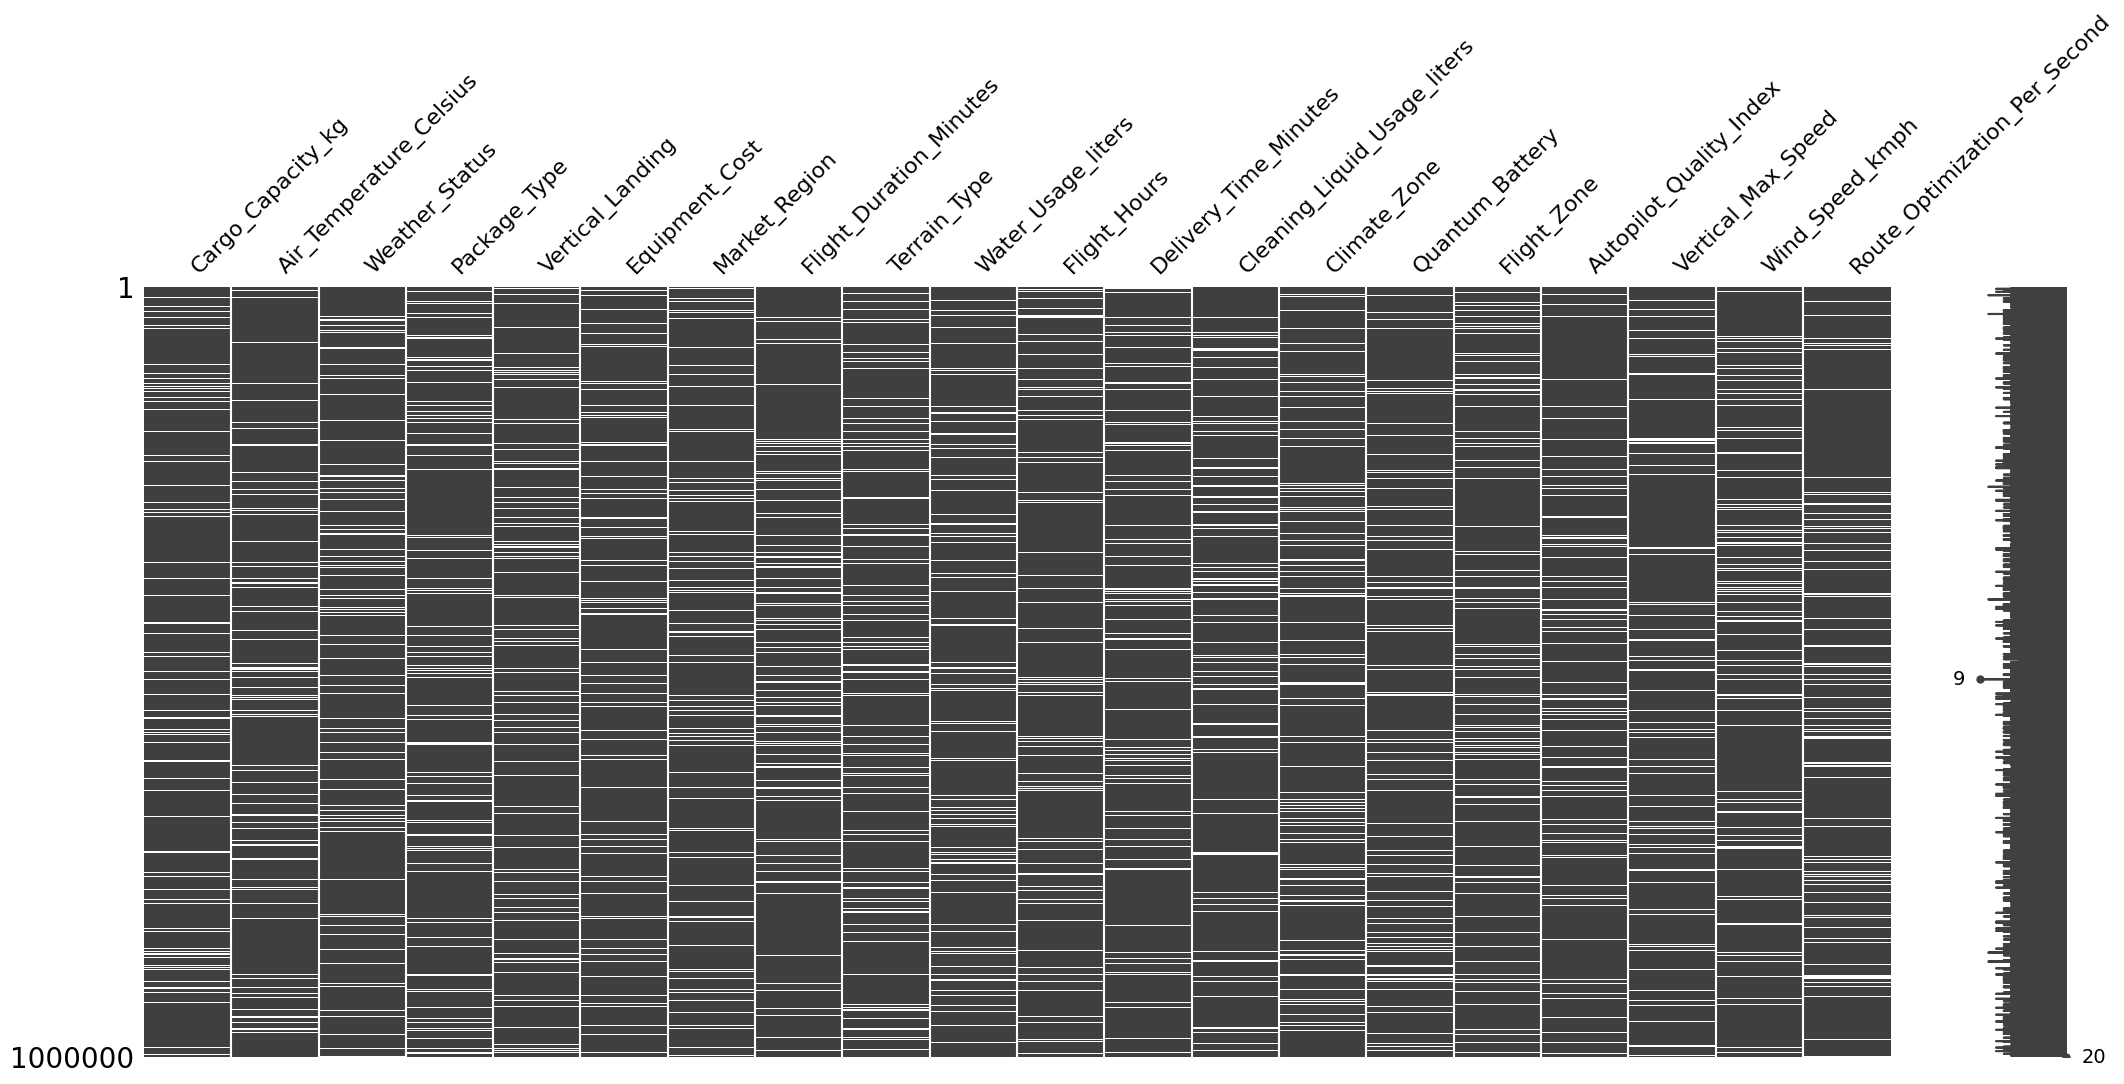

In [ ]:
import missingno as msno

msno.matrix(df)

### Handling Missing Values

## [SECTION 2] Methods

Regression. Lorem Ipsum.

In [ ]:
#code

## [SECTION 3] Experimental Design

Metrics. Lorem Ipsum.

In [7]:
#code

## [SECTION 4] Results

Lorem Ipsum.

In [9]:
#code

## [SECTION 5] Conclusions

In [ ]:
#code